In [727]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings

def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn  #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew  #for some statistics

In [728]:
#read date
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [729]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#1.data visualization exploration

In [730]:
train_ID = train['Id']
test_ID = test['Id']
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

print("The train data size after dropping Id feature is : {} ".format(
    train.shape))
print("The test data size after dropping Id feature is : {} ".format(
    test.shape))

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [731]:
#merge train and test data sets
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat([train, test]).reset_index(drop=True)  #合并后重新排列索引

In [732]:
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [733]:
# count the missing values of each feature
# sort in descending order
all_data_na = (all_data.isnull().sum() /
               len(all_data)) * 100  #len(all_data) return rows
all_data_na = all_data_na.drop(
    all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data.head(30)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

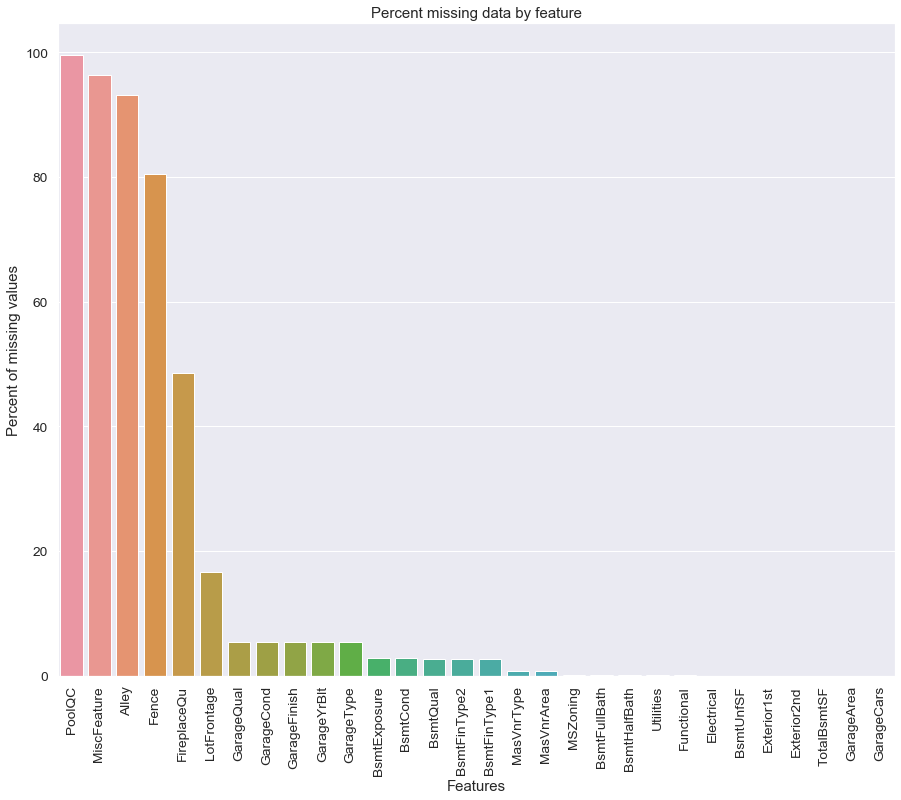

In [734]:
# display the missing degree
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

- explore the correlation between different features and house price
- handing outliers

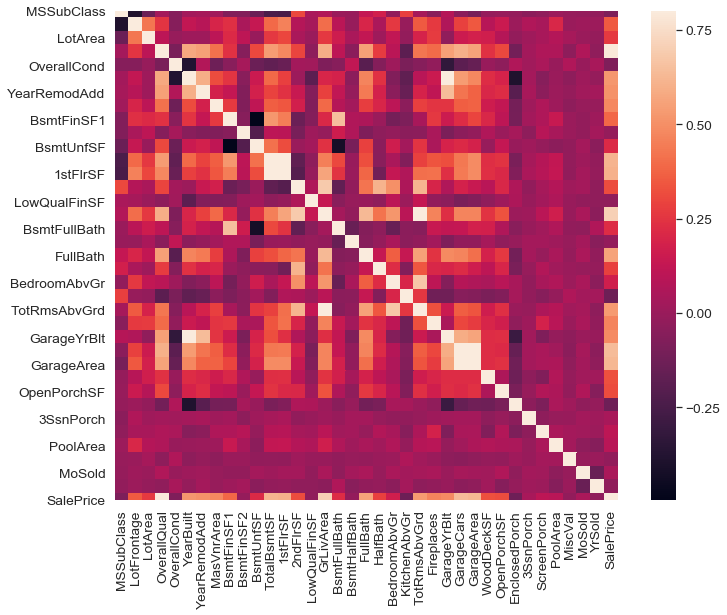

In [735]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

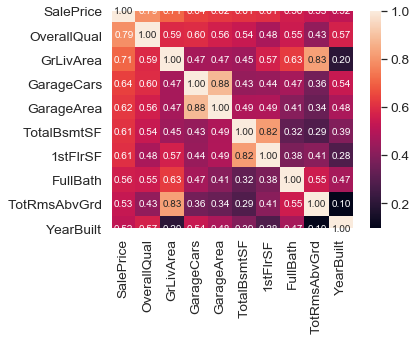

In [736]:
#select up to 10 of the most relevant variables
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

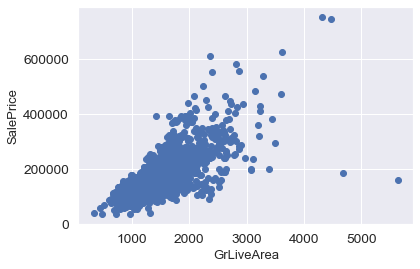

In [737]:
#GrLivArea represents living area
#2 outliers found
fig, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLiveArea', fontsize=13)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


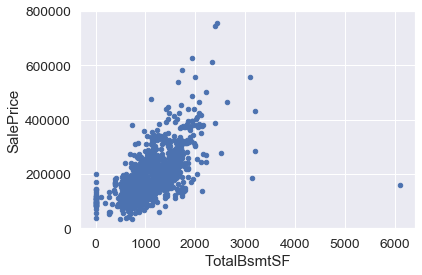

In [738]:
#TotalBsmtSF represents basement area
#1 outlier found
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

(-0.5, 9.5, 0, 800000)

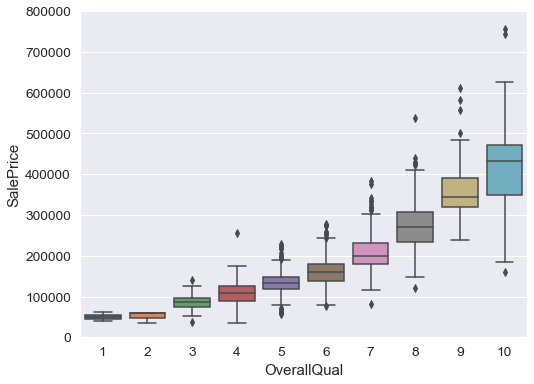

In [739]:
#relationship between house quality and house price
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

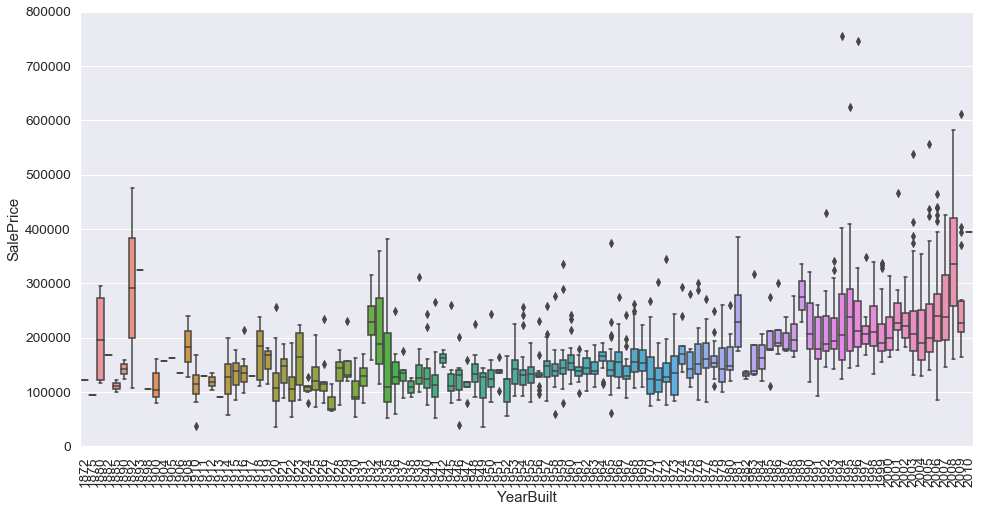

In [740]:
#relationship between house construction and house price
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

# 2.data processing
- handing outliers

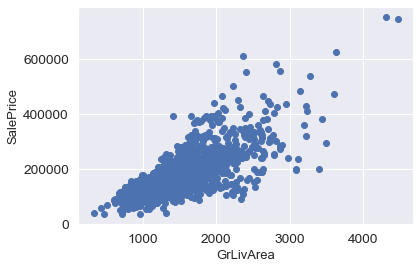

In [741]:
#remove outliers
train = train.drop(train[(train['GrLivArea'] > 4000)
                         & (train['SalePrice'] < 300000)].index)
#draw an image to detect whether the outliers are removed
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Text(0.5, 0, 'TotalBsmtSF')

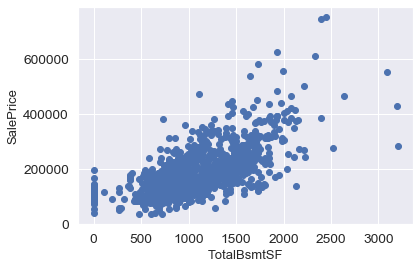

In [742]:
#handing basement area
train = train.drop(train[(train['TotalBsmtSF'] > 5000)
                         & (train['SalePrice'] < 200000)].index)

fig, ax = plt.subplots()
ax.scatter(train['TotalBsmtSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)

In [743]:
#再来看一下异常值的分布情况
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(
    all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data.head(50)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


In [744]:
#PoolQC,MiscFeature,Alley missing rate > 90%,delete directly
all_data = all_data.drop('PoolQC', axis=1)  #axis=1(column)
all_data = all_data.drop('MiscFeature', axis=1)
all_data = all_data.drop('Alley', axis=1)

#after deleting 3 columns,it became 76 columns
all_data.shape

(2919, 76)

In [745]:
#Fence,FireplaceQu
#if they are missing,it may mean no
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [746]:
#LotFrontage represent the length of house street
#steets in the same block may have the same length
#consider using the median of LotFrontage to fill missing values
all_data["LotFrontage"] = all_data.groupby(
    "Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [747]:
#may not have a garage,supplement with none
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [748]:
#supplement with 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [749]:
#supplement with 0
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
            'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [750]:
#basement related discrete variables,filled with none
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
            'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [751]:
# Mas为砖石结构相关变量，缺失值我们同样认为是没有砖石结构，用0和none填补缺失值
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [752]:
# MSZoning代表房屋所处的用地类型，给大家先看一下不同取值的个数
# 可以看到RL的取值最多
all_data.groupby('MSZoning')['MasVnrType'].count().reset_index()
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


业务上讲，房屋应该都有所在用地类型，且应该是上面几个值中的一个，所以有缺失值可能不是因为房屋没有用地类型导致，对于这种情况我们就最好不要用None填充，可以考虑用众数

In [753]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(
    all_data['MSZoning'].mode()[0])

In [754]:
#剩下的缺失值处理
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(
    all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(
    all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(
    all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(
    all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(
    all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [755]:
#再来看一下还有没有缺失值，发现已经没有了，到这我们就完成了对缺失值的处理
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(
    all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data.head()

,Missing Ratio


回归分析中存在一些前提假设。假设之一检测因变量是否符合正态性分布，从房价的直方图分布和qq-plot可以看出，房价的分布是右偏的，需要对其做一些转换让它符合正太分布

mu = 180932.92 and sigma = 79467.79


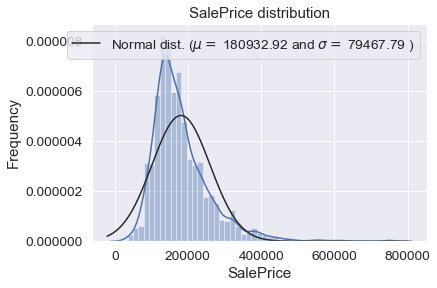

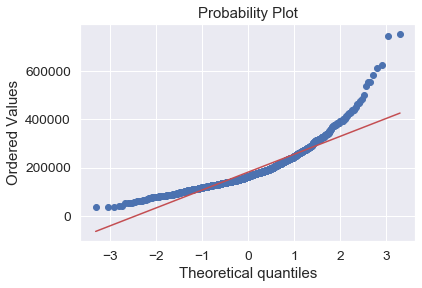

In [756]:
sns.distplot(train['SalePrice'] , fit=norm)

(mu, sigma) = norm.fit(train['SalePrice'])
print( 'mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

mu = 12.02 and sigma = 0.40


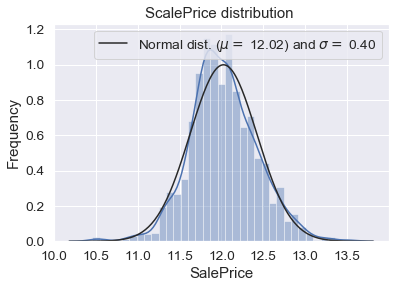

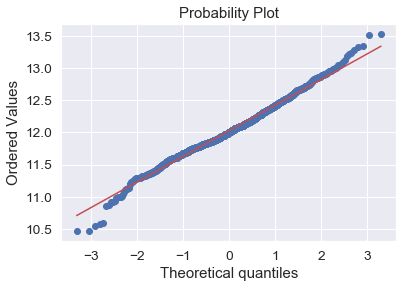

In [757]:
train['SalePrice'] = np.log1p(train['SalePrice'])

#distribution plot
sns.distplot(train['SalePrice'],fit = norm)

(mu, sigma) = norm.fit(train['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

plt.legend(
    ['Normal dist. ($\mu=$ {:.2f}) and $\sigma=$ {:.2f}'.format(mu, sigma)])

plt.ylabel('Frequency')
plt.title('ScalePrice distribution ')

#probability plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [758]:
#feature engineering
#TotalSF = TotalBsmtSF + 1stFlrSF + 2ndFlrSF
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data[
    '1stFlrSF'] + all_data['2ndFlrSF']
#create a 01 feature,if housing construction time > 1900s is 1,else 0
all_data['YearBuilt_cut'] = all_data['YearBuilt'].apply(lambda x: 1
                                                        if x > 1990 else 0)

In [759]:
#increase the columns SalePrice
tep = all_data[:ntrain]
tep['SalePrice'] = y_train

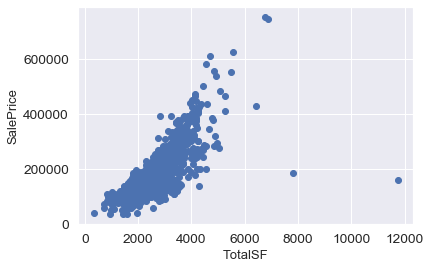

In [760]:
#area of the house has a strong linear with housing price
#but there are 2 outliers
fig, ax = plt.subplots()
ax.scatter(tep['TotalSF'], tep['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalSF', fontsize=13)
plt.show()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

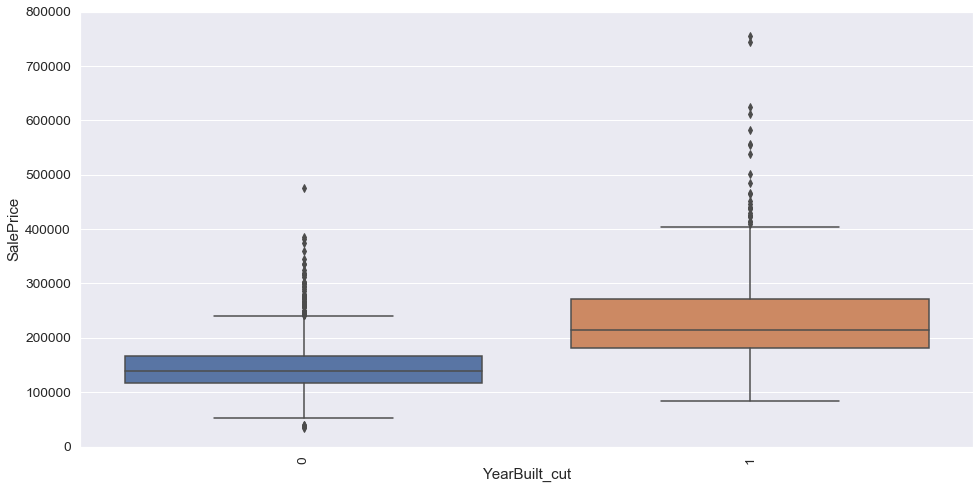

In [761]:
#the construction period,you can see there is a big difference in the
#distribution of houses price between houses built before 1990 and houses
#built after 1990.
var = 'YearBuilt_cut'
data = pd.concat([tep['SalePrice'], tep[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

In [762]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish',
        'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'CentralAir',
        'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lb1 = LabelEncoder()
    lb1.fit(list(all_data[c].values))
    all_data[c] = lb1.transform(list(all_data[c].values))
#shape
print('Shape all_data:{}'.format(all_data.shape))

Shape all_data:(2919, 77)


In [763]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF,YearBuilt_cut
0,856,854,0,3,1Fam,4,3,706.0,0.0,2,...,0,1,8,856.0,0,2003,2003,2,2566.0,1
1,1262,0,0,3,1Fam,4,1,978.0,0.0,0,...,0,1,6,1262.0,298,1976,1976,1,2524.0,0
2,920,866,0,3,1Fam,4,2,486.0,0.0,2,...,0,1,6,920.0,0,2001,2002,2,2706.0,1
3,961,756,0,3,1Fam,1,3,216.0,0.0,0,...,0,1,7,756.0,0,1915,1970,0,2473.0,0
4,1145,1053,0,4,1Fam,4,0,655.0,0.0,2,...,0,1,9,1145.0,192,2000,2000,2,3343.0,1


In [764]:
#数据集中还有部分非有序性离散变量，我们将他们转换成哑变量形式（和onehot一个意思）
all_data = pd.get_dummies(all_data)

In [765]:
all_data.shape

(2919, 219)

In [766]:
threshold = 0.9

#相关性矩阵
corr_matrix = all_data.corr().abs()
corr_matrix.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1stFlrSF,1.000000,0.249823,0.044086,0.108418,0.040297,0.247172,0.458206,0.084389,0.123944,0.024482,...,0.214149,0.005882,0.012406,0.000927,0.025617,0.001209,0.044160,0.214337,0.004251,0.163083
2ndFlrSF,0.249823,1.000000,0.032458,0.503506,0.016495,0.114369,0.161997,0.097654,0.158381,0.103646,...,0.012387,0.064275,0.004195,0.006715,0.030842,0.003710,0.003793,0.016457,0.038489,0.034428
3SsnPorch,0.044086,0.032458,1.000000,0.048279,0.004530,0.007307,0.050934,0.023268,0.048451,0.000965,...,0.026513,0.000832,0.006639,0.004280,0.009796,0.005747,0.005417,0.027589,0.005066,0.014798
BedroomAbvGr,0.108418,0.503506,0.048279,1.000000,0.003379,0.116382,0.113161,0.031111,0.105416,0.047212,...,0.050701,0.014303,0.004409,0.033248,0.037084,0.039499,0.022958,0.043436,0.033877,0.047671
BsmtCond,0.040297,0.016495,0.004530,0.003379,1.000000,0.103767,0.095140,0.003905,0.067643,0.072690,...,0.003567,0.015790,0.011458,0.013816,0.065433,0.006755,0.036183,0.006224,0.016353,0.025648


In [767]:
#只选择矩阵的上半部分
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1stFlrSF,NaN,0.249823,0.044086,0.108418,0.040297,0.247172,0.458206,0.084389,0.123944,0.024482,...,0.214149,0.005882,0.012406,0.000927,0.025617,0.001209,0.044160,0.214337,0.004251,0.163083
2ndFlrSF,NaN,NaN,0.032458,0.503506,0.016495,0.114369,0.161997,0.097654,0.158381,0.103646,...,0.012387,0.064275,0.004195,0.006715,0.030842,0.003710,0.003793,0.016457,0.038489,0.034428
3SsnPorch,NaN,NaN,NaN,0.048279,0.004530,0.007307,0.050934,0.023268,0.048451,0.000965,...,0.026513,0.000832,0.006639,0.004280,0.009796,0.005747,0.005417,0.027589,0.005066,0.014798
BedroomAbvGr,NaN,NaN,NaN,NaN,0.003379,0.116382,0.113161,0.031111,0.105416,0.047212,...,0.050701,0.014303,0.004409,0.033248,0.037084,0.039499,0.022958,0.043436,0.033877,0.047671
BsmtCond,NaN,NaN,NaN,NaN,NaN,0.103767,0.095140,0.003905,0.067643,0.072690,...,0.003567,0.015790,0.011458,0.013816,0.065433,0.006755,0.036183,0.006224,0.016353,0.025648


In [768]:
#有6项特征需要删掉
to_drop = [
    column for column in upper.columns if any(upper[column] > threshold)
]
print('There are %d columns to remove.' % (len(to_drop)))

There are 6 columns to remove.


In [769]:
all_data = all_data.drop(columns=to_drop)
all_data.shape

(2919, 213)

到这里我们就完成了建模之前的所有环节！下面将正式进入建模


In [770]:
#之前是把train和test数据集放在一起处理，现在再把他们分开
train = all_data[:ntrain]
test = all_data[ntrain:]

# 四、Modeling

In [771]:
#import package
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
#cross-validate
from sklearn.model_selection import cross_val_score

In [772]:
def remse_cv(model):
    rmse = np.sqrt(-cross_val_score(
        model, train, y_train, scoring="neg_mean_squared_error", cv=5))
    return (rmse)

In [773]:
#import model Ridge
model_ridge = Ridge()

在导入模型后，需要对模型进行调参，对于lasso模型来说，主要需要调节的参数是alpha，alpha决定模型的正则化程度。正则化程度越高，我们的模型越不容易过度拟合。然而，它也会失去灵活性，可能会欠拟合，我们需要在过拟合和欠拟合中寻找一个平衡，找到那个最佳参数，具体怎么找呢？我们可以列出不同的alpha取值，用我们上面定义的rmse_cv模型评分参数去看每个参数下模型的分数怎么样

In [774]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [remse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas]

可以看到曲线是一个耐克的标志，先降低后升高，在alpha值为5时，模型误差最小

Text(0, 0.5, 'rmse')

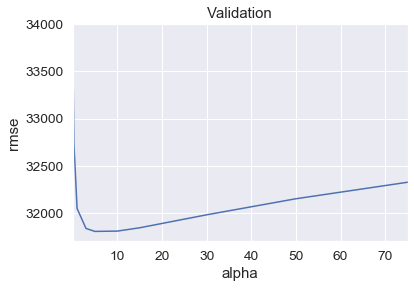

In [775]:
cv_ridge = pd.Series(cv_ridge, index=alphas)
cv_ridge.plot(title="Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [776]:
#alpha的参数用我们之前验证过的5，然后用训练集对模型进行训练
clf = Ridge(alpha=5)
clf.fit(train, y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [777]:
#最后对测试集进行预测
predict = clf.predict(test)

In [778]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = predict
sub.head()

,Id,SalePrice
0,1461,102481.075608
1,1462,148001.223102
2,1463,168658.731626
3,1464,175540.996322
4,1465,221122.057763
...,...,...
1454,2915,72027.103929
1455,2916,63210.165751
1456,2917,151554.112203
1457,2918,104696.408851
